In [96]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import pylab

In [58]:
# import raw data
xls = pd.ExcelFile('/Users/linzeyang/Desktop/BIA-686/Wine_data.xlsx')
df_white = xls.parse('White_Wine')
df_red = xls.parse('Red_Wine')

In [59]:
# Calculate mean for every column:
white_col_mean=df1.mean(0)
red_col_mean=df2.mean(0)

In [60]:
df_white[1:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [61]:
# Mean,std etc about target and every feature
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


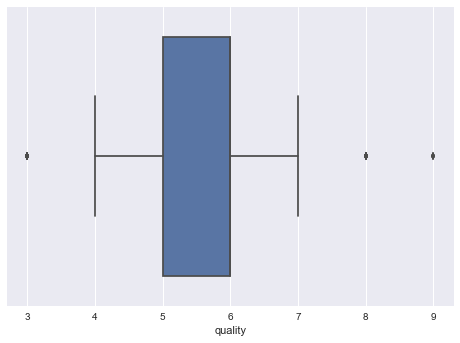

In [73]:
# Boxplot of Target.
sns.boxplot(df_white['quality'])
sns.plt.show()

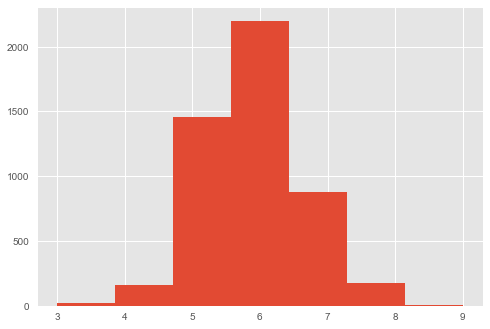

skewness: 0.155796397722
kurtosis: 0.216525827215


In [101]:
# Histogram of target output ;skew; kurt
mpl.style.available
mpl.style.use('ggplot')
df_white['quality'].hist(bins=7)
plt.show()
print 'skewness: ' + str(df_white['quality'].skew())
print 'kurtosis: ' + str(df_white['quality'].kurt())

In [99]:
df_white['quality'].skew()

0.15579639772222578

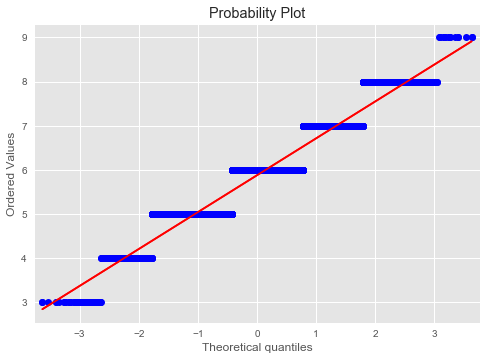

In [98]:
# Q-Q plot for target  --- conclusion: almost normal distributed.
# since output only are integers, such as 3, 4, 5, no 3.1,4.2, so NOT continuous
stats.probplot(df_white['quality'], dist="norm", plot=pylab)
pylab.show()

In [31]:
# Below are 654 stuffs
for k in range(len(white_col_mean)):
    s=df_white.ix[:,k]
    i=0
    for j in s:
        if j > white_col_mean[k] :
            df_white.ix[:,k][i]=1
            i = i+1
            if i > len(s):
                break
        else:
            s[i]=0
            i = i+1
            if i > len(s):
                break

/Users/linzeyang/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/linzeyang/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [44]:
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [39]:
df2.to_csv('/Users/linzeyang/Desktop/BIA-686/-.csv')